In [4]:
# Common imports
import numpy as np
import os
import pandas as pd
import tensorflow as tf

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "CICYs"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

## Importing the data

 ### CICY 3-folds

In [3]:
columns_cicy3 = ['idx','h11','h21'] + ['C2_'+str(i) for i in range(15)] + ['Cf_'+str(i) for i in range(270)] + ['favour','KahlerPos','is_product']

In [4]:
cicy3_df = pd.read_csv('datasets/cicy3.csv', header=None, names=columns_cicy3).drop('idx', axis = 1)

In [5]:
cicy3_df.head(3)

,h11,h21,C2_0,C2_1,C2_2,C2_3,C2_4,C2_5,C2_6,C2_7,...,Cf_263,Cf_264,Cf_265,Cf_266,Cf_267,Cf_268,Cf_269,favour,KahlerPos,is_product
0,15,15,36,24,36,24,36,36,24,36,...,0,0,0,0,0,1,0,1,0,0
1,15,15,24,36,24,36,36,24,36,24,...,0,0,0,0,0,1,0,1,0,0
2,15,15,24,36,24,36,36,24,36,36,...,0,0,0,0,0,1,0,1,0,0


In [6]:
cicy3_df.tail(3)

,h11,h21,C2_0,C2_1,C2_2,C2_3,C2_4,C2_5,C2_6,C2_7,...,Cf_263,Cf_264,Cf_265,Cf_266,Cf_267,Cf_268,Cf_269,favour,KahlerPos,is_product
7887,2,86,24,56,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7888,1,89,56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7889,1,101,50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [7]:
cicy3_df.index

RangeIndex(start=0, stop=7890, step=1)

Columns: 
- h11, h21 : Hodge numbers;
- C2_0 to C2_14 : coeff. of the 2nd Chern class of the manifold in some basis;
- Cf_0 to Cf_269 : coeff. of the configuration matrix (max size 15x18 = 270);
- favour : 1 if favourable, 0 if not;
- KahlerPos : 1 if naive ambient space Kahler cone descent to the CY, 0 if not;
- is_product : 1 of CY is a direct product, 0 if not.

In [8]:
cicy3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7890 entries, 0 to 7889
Columns: 290 entries, h11 to is_product
dtypes: int64(290)
memory usage: 17.5 MB


In [9]:
cicy3_df.describe()

,h11,h21,C2_0,C2_1,C2_2,C2_3,C2_4,C2_5,C2_6,C2_7,...,Cf_263,Cf_264,Cf_265,Cf_266,Cf_267,Cf_268,Cf_269,favour,KahlerPos,is_product
count,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,...,7890.000000,7890.0,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000,7890.000000
mean,7.419772,28.744740,26.914322,26.475285,26.749810,29.526996,29.118631,26.886185,22.249683,16.074525,...,0.000127,0.0,0.000253,0.000127,0.000380,0.000507,0.001014,0.991128,0.617744,0.002788
std,2.250891,8.577282,5.605803,5.413720,6.491315,8.978127,11.718088,14.997916,17.580484,18.093951,...,0.011258,0.0,0.015920,0.011258,0.019497,0.022512,0.031828,0.093778,0.485969,0.052734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,23.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,7.000000,27.000000,24.000000,24.000000,24.000000,24.000000,36.000000,36.000000,24.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,9.000000,33.000000,24.000000,24.000000,24.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,19.000000,101.000000,72.000000,72.000000,72.000000,72.000000,64.000000,60.000000,60.000000,56.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


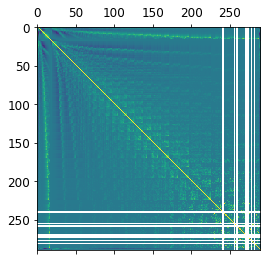

In [10]:
corr3 = cicy3_df.corr()

plt.matshow(corr3)
plt.show()

### CICY 4-folds

In [3]:
columns_cicy4 = ['idx','m','K'] + [str(i) for i in range(77)] + ['chi','is product','h11','h21','h31','h22','favour']
print(columns_cicy4)

['idx', 'm', 'K', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', 'chi', 'is product', 'h11', 'h21', 'h31', 'h22', 'favour']


In [4]:
cicy4_df = pd.read_csv('datasets/cicy4.csv', header=None, names=columns_cicy4).drop('idx', axis = 1)

In [5]:
cicy4_df.head(3)

,m,K,0,1,2,3,4,5,6,7,...,74,75,76,chi,is product,h11,h21,h31,h22,favour
0,1,1,6,0,0,0,0,0,0,0,...,0,0,0,2610,0,1,0,426,1752,1
1,1,2,2,5,0,0,0,0,0,0,...,0,0,0,2190,0,1,0,356,1472,1
2,1,2,3,4,0,0,0,0,0,0,...,0,0,0,1476,0,1,0,237,996,1


In [6]:
cicy4_df.tail(3)

,m,K,0,1,2,3,4,5,6,7,...,74,75,76,chi,is product,h11,h21,h31,h22,favour
182901,8,9,0,0,0,0,0,0,0,1,...,0,0,0,360,0,11,0,41,252,0
182902,8,9,0,0,0,0,0,0,0,1,...,0,0,0,384,0,10,0,46,268,0
182903,8,9,0,0,0,0,0,0,0,1,...,0,0,0,336,0,9,1,40,238,0


Columns: 
- m : number of ambient projective space factors;
- K : number of defining polynomials;
- 0 to 76 : coeff. of the configuration matrix (max size 7x11 = 77);
- chi : Euler characteristic;
- is_product = 1 of CY is a direct product, 0 if not;
- h11, h21, h31, h22 : Hodge numbers;
- favour = 1 if favourable, 0 if not.

In [7]:
len_cicy = len(cicy4_df)
len_cicy

182904

In [8]:
cicy4_df.iloc[0]['h11']

1

In [9]:
cicy4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182904 entries, 0 to 182903
Data columns (total 86 columns):
m             182904 non-null int64
K             182904 non-null int64
0             182904 non-null int64
1             182904 non-null int64
2             182904 non-null int64
3             182904 non-null int64
4             182904 non-null int64
5             182904 non-null int64
6             182904 non-null int64
7             182904 non-null int64
8             182904 non-null int64
9             182904 non-null int64
10            182904 non-null int64
11            182904 non-null int64
12            182904 non-null int64
13            182904 non-null int64
14            182904 non-null int64
15            182904 non-null int64
16            182904 non-null int64
17            182904 non-null int64
18            182904 non-null int64
19            182904 non-null int64
20            182904 non-null int64
21            182904 non-null int64
22            182904 non-

In [10]:
print('Number of CICYs: ', len(cicy4_df), '\nNumber of product CICYs: ', sum(cicy4_df["is product"]), 
      '\nNumber of favourable CICYs: ', sum(cicy4_df["favour"]))

Number of CICYs:  182904 
Number of product CICYs:  0 
Number of favourable CICYs:  121165


In [11]:
cicy4_df.describe()

,m,K,0,1,2,3,4,5,6,7,...,74,75,76,chi,is product,h11,h21,h31,h22,favour
count,182904.000000,182904.000000,182904.000000,182904.000000,182904.000000,182904.000000,182904.000000,182904.000000,182904.000000,182904.000000,...,182904.000000,182904.000000,182904.000000,182904.000000,182904.0,182904.000000,182904.000000,182904.000000,182904.000000,182904.000000
mean,6.427918,7.330184,0.000705,0.006255,0.031350,0.111348,0.260060,0.457918,0.548435,0.515954,...,0.000443,0.006036,0.001815,407.196923,0.0,7.545920,1.550770,53.871003,286.566155,0.662451
std,0.838102,1.481117,0.032476,0.087140,0.183522,0.327640,0.447576,0.515274,0.507840,0.525525,...,0.021040,0.077457,0.042566,119.263746,0.0,2.248296,3.055315,19.801747,77.348095,0.472875
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,288.000000,0.0,1.000000,0.000000,20.000000,204.000000,0.000000
25%,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,330.000000,0.0,6.000000,0.000000,42.000000,236.000000,0.000000
50%,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,378.000000,0.0,7.000000,0.000000,49.000000,268.000000,1.000000
75%,7.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,450.000000,0.0,8.000000,2.000000,60.000000,312.000000,1.000000
max,8.000000,11.000000,6.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,2610.000000,0.0,24.000000,33.000000,426.000000,1752.000000,1.000000


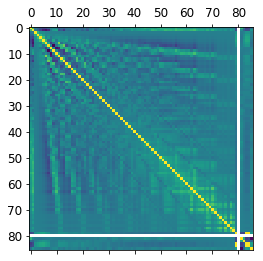

In [12]:
corr4 = cicy4_df.corr()

plt.matshow(corr4)
plt.show()

### Creating Train and Test  sets

In [ ]:
n_cicy = len(cicy4_df)
train_df, test_df = np.split(cicy4_df.sample(frac=1), [int(0.8*n_cicy)])

In [134]:
test_df.to_csv("test.csv", index=False)

In [125]:
train_df.head()

,m,K,0,1,2,3,4,5,6,7,...,74,75,76,chi,is product,h11,h21,h31,h22,favour
48971,6,7,0,0,0,0,0,1,1,0,...,0,0,0,444,0,6,0,60,308,1
171172,7,9,0,0,0,0,0,0,0,1,...,0,0,0,330,0,10,0,37,232,0
76717,7,5,0,0,0,1,1,0,0,0,...,0,0,0,360,0,9,1,44,254,0
162583,7,10,0,0,0,0,0,0,0,0,...,0,0,0,408,0,7,0,53,284,1
127870,7,7,0,0,0,0,0,1,1,0,...,0,0,0,360,0,9,0,43,252,0


In [126]:
test_df.head()

,m,K,0,1,2,3,4,5,6,7,...,74,75,76,chi,is product,h11,h21,h31,h22,favour
33030,6,7,0,0,0,0,0,1,1,0,...,0,0,0,396,0,6,0,52,276,1
122516,7,9,0,0,0,0,0,0,0,1,...,0,0,0,468,0,8,0,62,324,0
26270,6,5,0,0,0,1,1,0,0,1,...,0,0,0,288,0,6,11,45,226,1
69922,6,9,0,0,0,0,0,0,0,1,...,0,0,0,348,0,6,1,45,246,1
144111,7,8,0,0,0,0,0,0,1,1,...,0,0,0,300,0,13,6,35,224,0


## Data enhancement

We create more data by adding equivalent CICYs obtained by permutations of the defining matrices.

In [229]:
def permute_single_cicy4(cicy,n_row,n_col, perm_row, perm_col):
    """Generate a df from cicy_df by applying a permutation perm_col on the n_col first columns 
    and a permutations perm_row on the n_row first rows of the configuration matrix."""
    cicy_perm = cicy 
    mat = cicy[2:n_row*n_col+2].values.reshape(n_row,n_col)
    mat = mat[perm_row,:]
    mat = mat[:,perm_col]
    flat_mat = mat.reshape(1,-1)[0]
    cicy_perm[2:n_row*n_col+2] = flat_mat
    return cicy_perm

In [230]:
n_row = 7
n_col = 11

np.random.seed(42)
perm_row = np.random.permutation(n_row)
perm_col = np.random.permutation(n_col)

print(perm_row, perm_col)

[0 1 5 2 4 3 6] [ 0  1  5  3 10  7  8  9  2  6  4]


In [231]:
def generate_cicy4(cicy_df, n_row, n_col, n_cicy, n_seed):
    """Generate a df from a random subset cicy_df with n_cicy rows, 
    by applying permute_single_cicy4 to this subset."""
    np.random.seed(n_seed)
    new_cicy = cicy_df.iloc[np.random.choice(len(cicy_df), n_cicy)].copy()
    
    for i in range(n_cicy):
        perm_row = np.random.permutation(n_row)
        perm_col = np.random.permutation(n_col)
        cicy = permute_single_cicy4(new_cicy.iloc[i],n_row,n_col,perm_row,perm_col)
        new_cicy.iloc[i] = cicy.copy()
    
    return new_cicy

In [ ]:
cicy4_42 = generate_cicy4(train_df, n_row, n_col, 10, n_seed = 42)

In [128]:
cicy4_42

,m,K,0,1,2,3,4,5,6,7,...,74,75,76,chi,is product,h11,h21,h31,h22,favour
81721,7,6,0,0,1,0,1,1,0,0,...,0,0,1,594,0,8,0,83,408,0
139347,7,8,0,0,0,0,0,0,0,1,...,0,0,0,396,0,7,0,51,276,1
134746,7,7,0,0,0,1,0,0,1,0,...,0,0,0,576,0,7,0,81,396,1
53498,6,9,0,1,0,1,1,0,0,0,...,0,0,0,426,0,6,0,57,296,1
115455,7,9,0,0,1,1,0,0,0,0,...,1,0,1,288,0,7,8,41,220,1
16381,5,6,0,0,0,0,0,0,0,0,...,1,1,0,498,0,5,0,70,344,1
39675,6,6,0,0,0,0,0,0,0,0,...,1,1,1,294,0,6,4,39,216,1
181110,8,5,0,1,1,0,0,0,0,1,...,0,0,0,720,0,9,0,103,492,0
43804,6,7,0,0,0,0,0,1,1,1,...,0,0,0,408,0,6,0,54,284,1
114829,7,8,0,0,0,0,0,0,0,0,...,0,0,0,492,0,7,0,67,340,1


We can now create the final datasets of CICY4 manifolds. We create a small set and a larger set, to see how the performance evolves with the size of the training set. The small set is just a permutation of the original cicy dataset.

In [ ]:
n_row = 7
n_col = 11

cicy4_small_df = generate_cicy4(train_df, n_row, n_col, n_cicy=len(train_df), n_seed=42)

In [131]:
cicy4_small_df.to_csv('cicy4_small.csv',index=False)

In [132]:
cicy4_small_df.head()

,m,K,0,1,2,3,4,5,6,7,...,74,75,76,chi,is product,h11,h21,h31,h22,favour
81721,7,6,0,0,0,0,0,0,0,0,...,0,0,0,594,0,8,0,83,408,0
139347,7,8,0,0,0,0,0,0,0,0,...,0,0,0,396,0,7,0,51,276,1
134746,7,7,0,1,0,0,1,1,0,0,...,0,0,0,576,0,7,0,81,396,1
53498,6,9,0,1,1,0,0,0,0,0,...,0,2,1,426,0,6,0,57,296,1
115455,7,9,1,0,0,0,0,0,0,0,...,1,0,0,288,0,7,8,41,220,1


In [260]:
cicy4_df = pd.read_csv('cicy4_small.csv')
cicy4_large_df = cicy4_df.copy()

for i in range(9):
    if i%1==0:
        print("Done {} steps.".format(i))
        cicy4_large_df = cicy4_large_df.append(generate_cicy4(cicy4_df, n_row, n_col, n_cicy=len(cicy4_df), n_seed=43+i))

cicy4_large_df.to_csv('cicy4_large.csv',index=False)

Done 0 steps.
Done 1 steps.
Done 2 steps.
Done 3 steps.
Done 4 steps.
Done 5 steps.
Done 6 steps.
Done 7 steps.
Done 8 steps.


In [261]:
print(len(cicy4_large_df), len(cicy4_df))

1463230 146323


## Learning h22 and chi (Euler characteristic) from the other Hodge numbers

The Euler characteristic is given by a simple linear formula in terms of the Hodge numbers. 
In addition, for CICY4 manifolds, there is a linear relation between the Hodge numbers, so that we can derive say h22 in terms of h11, h21 and h31.
Let us pretend we don't know these formulas and we want to recover them from a linear fit

In [136]:
df = pd.read_csv('cicy4_small.csv')
test_df = pd.read_csv('test.csv')
df.head()

,m,K,0,1,2,3,4,5,6,7,...,74,75,76,chi,is product,h11,h21,h31,h22,favour
0,7,6,0,0,0,0,0,0,0,0,...,0,0,0,594,0,8,0,83,408,0
1,7,8,0,0,0,0,0,0,0,0,...,0,0,0,396,0,7,0,51,276,1
2,7,7,0,1,0,0,1,1,0,0,...,0,0,0,576,0,7,0,81,396,1
3,6,9,0,1,1,0,0,0,0,0,...,0,2,1,426,0,6,0,57,296,1
4,7,9,1,0,0,0,0,0,0,0,...,1,0,0,288,0,7,8,41,220,1


In [137]:
X_train = np.array(df[["h11","h21","h31"]])
y_train = df[["chi","h22"]].values

X_test = np.array(test_df[["h11","h21","h31"]])
y_test = test_df[["chi","h22"]].values

In [139]:
X_train[3]

array([ 6,  0, 57])

In [41]:
y_train[:5]

array([[432, 300],
       [402, 280],
       [486, 336],
       [312, 224],
       [288, 212]])

In [140]:
print(len(X_train), ',', len(X_test))

146323 , 36581


In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv=5)

lin_reg_scores = np.sqrt(-scores)

In [25]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [143]:
display_scores(lin_reg_scores)

Scores: [1.06307435e-13 1.14807043e-13 1.23123008e-13 1.63780373e-13
 1.88198530e-13]
Mean: 1.392432777539196e-13
Standard deviation: 3.1433892951191135e-14


The linear model performs great (as expected) on the cross-validation sets.

Let's get get the accuray on the test set. 

In [144]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)
print("RMSE = {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE = 6.44095920038017e-14


It is close to zero as expected. 

Let us get the parameters of the linear fit.

In [147]:
print(lin_reg.coef_, lin_reg.intercept_)

[[ 6. -6.  6.]
 [ 4. -2.  4.]] [48. 44.]


We find the relations:  
chi = 6(h11 - h21 + h31 + 8)  
h22 = 2(2.h11 - h21 + 2.h31 + 22)  
This is correct.

## Learning h11 from the conf. mat.

Learning the other Hodge numbers is apriori chalenging.  
Here we try to learn h11 from the CICY matrix coefficients.

### Loading train and test sets

In [6]:
df = pd.read_csv('cicy4_small.csv')
test_df = pd.read_csv('test.csv')

X_train = df.iloc[:,:79]
y_train = df[["h11"]].values.reshape(-1,)

X_test = test_df.iloc[:,:79]
y_test = test_df[["h11"]].values.reshape(-1,)

In [151]:
X_train.tail()

,m,K,0,1,2,3,4,5,6,7,...,67,68,69,70,71,72,73,74,75,76
146318,7,9,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
146319,6,9,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
146320,6,7,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
146321,7,7,1,1,1,1,2,0,0,1,...,0,0,0,1,0,0,0,1,1,0
146322,4,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
y_train[-5:]

array([7, 6, 6, 7, 4])

In [153]:
print(len(X_train), len(X_test))

146323 36581


Some information about the target (h11 values)

In [154]:
train_df["h11"].describe()

count    146323.000000
mean          7.552353
std           2.255607
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: h11, dtype: float64

In [201]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{1: 6,
 2: 74,
 3: 576,
 4: 3046,
 5: 10952,
 6: 28777,
 7: 57069,
 8: 11952,
 9: 9603,
 10: 11836,
 11: 2961,
 12: 2389,
 13: 2667,
 14: 1627,
 15: 1355,
 16: 641,
 17: 326,
 18: 213,
 19: 104,
 20: 59,
 21: 19,
 22: 29,
 24: 42}

In [37]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Dummy model  
We give the score and accuracy of the dummy model which predict always the (training set) mean value of h11, for future comparison.

In [190]:
y_pred_float = np.ones(len(y_test))*y_train.mean()
y_pred_int = np.ones(len(y_test))*np.rint(y_train.mean()).astype(int)

In [191]:
print(y_pred_float[:3])
print(y_pred_int[:3])

[7.55328964 7.55328964 7.55328964]
[8. 8. 8.]


In [202]:
score = np.sqrt(sum((y_test-y_pred_float)**2)/len(y_test))
acc = sum(y_test==y_pred_int)*100/len(y_test)
print("RMSE (score): {:.2f}\nAccuracy: {:.2f}%".format(score,acc))

RMSE (score): 2.22
Accuracy: 8.41%


### Linear regression

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X_train.values, y_train, scoring = 'neg_mean_squared_error', cv=5)

lin_reg_scores = np.sqrt(-scores)
display_scores(lin_reg_scores)

Scores: [2.03525895 2.04498783 2.08559673 2.04323489 2.08319464]
Mean: 2.0584546087100355
Standard deviation: 0.021446661680536695


We get a deviation of 2 on average to the value of h11, whose mean value is 7. Pretty bad.

In [209]:
from sklearn.metrics import accuracy_score

lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
y_pred_int = np.rint(y_pred).astype(int)
print("Accuracy: {:.2f}%".format(accuracy_score(y_pred_int, y_test)*100))

Accuracy: 7.85%


Not a good model! (worst than dummy model)

### SVR with polynomial kernel (degree 2)

In [58]:
# takes 6 hours with small dataset.
from sklearn.svm import SVR

svm_poly = SVR(kernel='poly',degree=2,gamma='auto')
scores_poly = cross_val_score(svm_poly, X_train.values, y_train, scoring = 'neg_mean_squared_error', cv=5)

svm_poly_scores = np.sqrt(-scores_poly)
display_scores(svm_poly_scores)

Scores: [2.18654573 2.17076424 2.19252252 2.19852895 2.23296143]
Mean: 2.1962645755907735
Standard deviation: 0.020545133351779293


In [ ]:
# takes too long.
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [{'kernel':['rbf'], 'C':[0.1,0.3,1,3,10], 'gamma':[0.1,0.3,1,3,10]}]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train.values,y_train)

### RandomForest

In [211]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=10, n_jobs=-1)

neg_scores = cross_val_score(forest_reg, X_train.values, y_train, scoring="neg_mean_squared_error", cv=5)

forest_scores =np.sqrt(-neg_scores)
display_scores(forest_scores)

Scores: [2.04585901 2.06513857 2.10372122 2.05026238 2.09846321]
Mean: 2.0726888769504526
Standard deviation: 0.024112730686921907


In [66]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators':[200,500], 'max_depth':[20,30], 'max_features':[20,40]}

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

start_time = time.time()
grid_search.fit(X_train.values,y_train)
end_time = time.time()
print("Process takes {} minutes.".format((end_time-start_time)/60))

Process takes 252.61143448352814 minutes.


In [67]:
grid_search.best_params_

{'max_depth': 30, 'max_features': 20, 'n_estimators': 500}

In [68]:
np.sqrt(-grid_search.best_score_)

1.9431267959510887

In [213]:
forest_reg = RandomForestRegressor(n_estimators=500, max_depth=30, max_features=20, n_jobs=-1)
forest_reg.fit(X_train.values,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [214]:
from sklearn.metrics import accuracy_score

y_pred = forest_reg.predict(X_test)
y_pred_int = np.rint(y_pred).astype(int)
print("Accuracy: {:.2f}%".format(accuracy_score(y_pred_int, y_test)*100))

Accuracy: 6.96%


Still not good.

### LightGB Model

In [53]:
from lightgbm import LGBMRegressor

In [67]:
#for tuning parameters
import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters_for_testing = {'num_leaves': [60,90,120], 
                          'min_data_in_leaf': [4,8,12,16], 
                          'max_depth': [16,32,64,128],
                          'learning_rate': [0.03,0.1],
                          'feature_fraction': [0.85,0.9,0.95] ,
                          "bagging_freq": [2,3,4],  # bagging after k iterations. 0 means no bagging.
                          "bagging_fraction": [0.8,0.9], 
                          "bagging_seed": [13],
                          'lambda_l2': [0.01,0.03,0.05],
                          'n_estimator':[50,100,150]
                         }

lgb_model = LGBMRegressor(metric='rmse', random_state=42, n_threads=2, verbosity=-1)

rd_search_lgb = RandomizedSearchCV(estimator = lgb_model, param_distributions = parameters_for_testing, n_iter=200, cv=3,
                        n_jobs=-1, verbose=-1, scoring='neg_mean_squared_error', random_state=123)
start = time.time()
rd_search_lgb.fit(X_train,y_train)
end = time.time()
print("Process takes {} minutes.".format((end-start)/60))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 39.5min finished


Process takes 39.55057351986567 minutes.


In [68]:
print('best params')
print (rd_search_lgb.best_params_)
print('best score')
print (np.sqrt(-rd_search_lgb.best_score_))

best params
{'num_leaves': 120, 'n_estimator': 150, 'min_data_in_leaf': 16, 'max_depth': 32, 'learning_rate': 0.1, 'lambda_l2': 0.05, 'feature_fraction': 0.95, 'bagging_seed': 13, 'bagging_freq': 2, 'bagging_fraction': 0.8}
best score
1.783838149896326


In [161]:
from sklearn.model_selection import KFold
n_folds = 5
folds = KFold(n_splits=n_folds, shuffle=True, random_state=11)

params = {'num_leaves': 5, 
         'min_data_in_leaf': 32, 
         'max_depth': 4,  # very small, but gives the best results !!!
         'learning_rate': 0.1,
         "feature_fraction": 0.9, 
         "bagging_freq": 2,
         "bagging_fraction": 0.8, 
         "bagging_seed": 13,
         "lambda_l2": 0.1
         }

In [162]:
lgbm_reg = LGBMRegressor(**params, metric='rmse', n_estimators= 5000, n_threads=2, n_jobs=-1, verbosity=-1, random_state=42)
lgbm_train_scores = []
lgbm_val_scores = []

# I use manual cross-validation so that I can add early stopping.
for fold_, (train_idx, val_idx) in enumerate(folds.split(X_train,y_train)):
    
    print("Fold {}:".format(fold_))
    X_tr , y_tr = X_train.iloc[train_idx], y_train[train_idx]
    X_val , y_val = X_train.iloc[val_idx], y_train[val_idx]
    
    lgbm_reg.fit(X_tr,y_tr, early_stopping_rounds=100, eval_set=[(X_tr, y_tr), (X_val, y_val)], 
                 eval_metric='rmse', verbose=250)
    lgbm_train_scores.append(lgbm_reg.best_score_['training']['rmse'])
    lgbm_val_scores.append(lgbm_reg.best_score_['valid_1']['rmse'])

print("\nTraining scores:")
display_scores(np.array(lgbm_train_scores))
print("\nValidation scores:")
display_scores(np.array(lgbm_val_scores))

Fold 0:
Training until validation scores don't improve for 100 rounds.
[250]	training's rmse: 1.87146	valid_1's rmse: 1.87225
[500]	training's rmse: 1.78609	valid_1's rmse: 1.79016
[750]	training's rmse: 1.74706	valid_1's rmse: 1.75759
[1000]	training's rmse: 1.72577	valid_1's rmse: 1.74273
[1250]	training's rmse: 1.71209	valid_1's rmse: 1.73475
[1500]	training's rmse: 1.70289	valid_1's rmse: 1.73223
[1750]	training's rmse: 1.69712	valid_1's rmse: 1.73117
Early stopping, best iteration is:
[1786]	training's rmse: 1.69664	valid_1's rmse: 1.73047
Fold 1:
Training until validation scores don't improve for 100 rounds.
[250]	training's rmse: 1.86955	valid_1's rmse: 1.88496
[500]	training's rmse: 1.78402	valid_1's rmse: 1.80139
[750]	training's rmse: 1.74552	valid_1's rmse: 1.76771
[1000]	training's rmse: 1.72503	valid_1's rmse: 1.751
[1250]	training's rmse: 1.71175	valid_1's rmse: 1.74251
[1500]	training's rmse: 1.70258	valid_1's rmse: 1.73897
[1750]	training's rmse: 1.69714	valid_1's rmse:

In [216]:
from sklearn.metrics import accuracy_score

lgbm_reg.fit(X_train,y_train)

y_pred = lgbm_reg.predict(X_test)
y_pred_int = np.rint(y_pred).astype(int)
print("Accuracy: {:.2f}%".format(accuracy_score(y_pred_int, y_test)*100))

Accuracy: 31.32%


Significant improvement over previous models. Still not amazing.

### XGBoost model

In [7]:
import xgboost as xgb
from xgboost import XGBRegressor

In [31]:
#for tuning parameters
import time
from sklearn.model_selection import GridSearchCV

parameters_for_testing = {
    'colsample_bytree':[0.7,0.8],
    'gamma':[0.5],
    'min_child_weight':[10,12],
    'learning_rate':[0.1],
    'max_depth':[16,64],
    'alpha':[0.001],
    'lambda':[0.001],
    'subsample':[0.9],
    'n_threads':[2],
    'seed':[27],
    'n_estimators':[20,30]
}

xgb_model = XGBRegressor()

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, cv=3,
                        n_jobs=-1,iid=False, verbose=-1,scoring='neg_mean_squared_error')
start = time.time()
gsearch1.fit(X_train,y_train)
end = time.time()
print("Process takes {} minutes.".format((end-start)/60))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 21.7min finished


[20:47:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Process takes 24.907593150933582 minutes.


In [32]:
print('best params')
print (gsearch1.best_params_)
print('best score')
print (np.sqrt(-gsearch1.best_score_))

best params
{'alpha': 0.001, 'colsample_bytree': 0.8, 'gamma': 0.5, 'lambda': 0.001, 'learning_rate': 0.1, 'max_depth': 64, 'min_child_weight': 12, 'n_estimators': 30, 'n_threads': 2, 'seed': 27, 'subsample': 0.9}
best score
1.9087418205834794


In [47]:
from sklearn.model_selection import KFold
n_folds = 5
folds = KFold(n_splits=n_folds, shuffle=True, random_state=11)

xgb_params = {
    'colsample_bytree':0.8,
    'gamma':0.5,
    'min_child_weight':12,
    'learning_rate':0.1,
    #'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'max_depth':4,
    'alpha':0.1,
    'lambda':0.1,
    'subsample':0.9,
    'n_threads':2,
    'seed':27,
    'n_estimators':15
}

In [48]:
from sklearn.metrics import mean_squared_error

xgb_tr_scores = []
xgb_val_scores = []

for fold_, (train_idx, val_idx) in enumerate(folds.split(X_train,y_train)):
    
    print("Fold {}:".format(fold_))
    X_tr , y_tr = X_train.iloc[train_idx], y_train[train_idx]
    X_val , y_val = X_train.iloc[val_idx], y_train[val_idx]
    
    train_data = xgb.DMatrix(data=X_tr, label=y_tr, feature_names=X_tr.columns)
    valid_data = xgb.DMatrix(data=X_val, label=y_val, feature_names=X_val.columns)

    watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
    model = xgb.train(dtrain=train_data, num_boost_round=1000, evals=watchlist, early_stopping_rounds=20, 
                      verbose_eval=200, params=xgb_params)
    y_pred_tr = model.predict(xgb.DMatrix(X_tr, feature_names=X_tr.columns), ntree_limit=model.best_ntree_limit)
    y_pred_val = model.predict(xgb.DMatrix(X_val, feature_names=X_val.columns), ntree_limit=model.best_ntree_limit)
    #y_pred = model.predict(xgb.DMatrix(X_test, feature_names=X_test.columns), ntree_limit=model.best_ntree_limit)
    
    score_tr = np.sqrt(mean_squared_error(y_pred_tr,y_tr))
    score_val = np.sqrt(mean_squared_error(y_pred_val,y_val))
    xgb_tr_scores.append(score_tr)
    xgb_val_scores.append(score_val)
    
    #best_xgb_model.fit(X_tr,y_tr, early_stopping_rounds=400, eval_set=[(X_tr, y_tr), (X_val, y_val)], 
    #             eval_metric='rmse', verbose=25)


print("\nTraining scores:")
display_scores(np.array(xgb_tr_scores))
print("\nValidation scores:")
display_scores(np.array(xgb_val_scores))

Fold 0:
[0]	train-rmse:6.74231	valid_data-rmse:6.72543
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 20 rounds.
[200]	train-rmse:1.81941	valid_data-rmse:1.86177
[400]	train-rmse:1.71602	valid_data-rmse:1.7861
[600]	train-rmse:1.66654	valid_data-rmse:1.75711
[800]	train-rmse:1.6365	valid_data-rmse:1.7474
Stopping. Best iteration:
[885]	train-rmse:1.6267	valid_data-rmse:1.74525

Fold 1:
[0]	train-rmse:6.73702	valid_data-rmse:6.74569
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 20 rounds.
[200]	train-rmse:1.81898	valid_data-rmse:1.87096
[400]	train-rmse:1.71591	valid_data-rmse:1.79401
[600]	train-rmse:1.66715	valid_data-rmse:1.76541
[800]	train-rmse:1.63726	valid_data-rmse:1.75185
[999]	train-rmse:1.6161	valid_data-rmse:1.74658
Fold 2:
[0]	train-rmse:6.74105	valid_data-rmse:6.72858
Multiple eval

In [218]:
data_dmatrix = xgb.DMatrix(data=X_train, label=y_train, feature_names=X_train.columns)

start = time.time()
cv_results = xgb.cv(dtrain=data_dmatrix, params=xgb_params, nfold=5,
                    num_boost_round=1000, early_stopping_rounds=20, metrics="rmse", as_pandas=True, seed=11)
end = time.time()
print("This took {} minutes.".format((end-start)/60))

This took 36.571964367230734 minutes.


In [219]:
cv_results.tail()

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
995,1.747969,0.005403,1.615075,0.000883
996,1.747991,0.005413,1.614987,0.000883
997,1.747979,0.005409,1.614897,0.000889
998,1.747916,0.005418,1.614832,0.000885
999,1.747912,0.005429,1.614732,0.000871


In [223]:
from sklearn.metrics import accuracy_score

xgb_params = {
    'colsample_bytree':0.8,
    'gamma':0.5,
    'min_child_weight':12,
    'learning_rate':0.1,
    #'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'max_depth':4,
    'alpha':0.1,
    'lambda':0.1,
    'subsample':0.9,
    'n_threads':2,
    'seed':27,
    'n_estimators':15
}

xgb_reg = XGBRegressor(params=xgb_params)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)
y_pred_int = np.rint(y_pred).astype(int)
print("Accuracy: {:.2f}%".format(accuracy_score(y_pred_int, y_test)*100))

[17:57:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 6.68%


## Results with Augmented Training Set

In [5]:
df_augmented = pd.read_csv('cicy4_large.csv')
test_df = pd.read_csv('test.csv')

X_train = df_augmented.iloc[:,:79]
y_train = df_augmented[["h11"]].values.reshape(-1,)

X_test = test_df.iloc[:,:79]
y_test = test_df[["h11"]].values.reshape(-1,)

### LGBM model

In [9]:
from lightgbm import LGBMRegressor

In [22]:
from sklearn.model_selection import KFold
n_folds = 5
folds = KFold(n_splits=n_folds, shuffle=True, random_state=11)

params = {'num_leaves': 64, 
         'min_data_in_leaf': 64, 
         'max_depth': 8,  
         'learning_rate': 0.03,
         "feature_fraction": 0.9, 
         "bagging_freq": 2,
         "bagging_fraction": 0.8, 
         "bagging_seed": 13,
         "lambda_l2": 0.03
         }

In [23]:
lgbm_reg = LGBMRegressor(**params, metric='rmse', n_estimators= 5000, n_threads=2, n_jobs=-1, verbosity=-1, random_state=42)
lgbm_train_scores = []
lgbm_val_scores = []

# I use manual cross-validation so that I can add early stopping.
for fold_, (train_idx, val_idx) in enumerate(folds.split(X_train,y_train)):
    
    print("Fold {}:".format(fold_))
    X_tr , y_tr = X_train.iloc[train_idx], y_train[train_idx]
    X_val , y_val = X_train.iloc[val_idx], y_train[val_idx]
    
    lgbm_reg.fit(X_tr,y_tr, early_stopping_rounds=100, eval_set=[(X_tr, y_tr), (X_val, y_val)], 
                 eval_metric='rmse', verbose=250)
    lgbm_train_scores.append(lgbm_reg.best_score_['training']['rmse'])
    lgbm_val_scores.append(lgbm_reg.best_score_['valid_1']['rmse'])

print("\nTraining scores:")
display_scores(np.array(lgbm_train_scores))
print("\nValidation scores:")
display_scores(np.array(lgbm_val_scores))

Fold 0:
Training until validation scores don't improve for 100 rounds.
[250]	training's rmse: 1.86818	valid_1's rmse: 1.87898
[500]	training's rmse: 1.76978	valid_1's rmse: 1.78719
[750]	training's rmse: 1.72337	valid_1's rmse: 1.74706
[1000]	training's rmse: 1.69945	valid_1's rmse: 1.72823
[1250]	training's rmse: 1.68621	valid_1's rmse: 1.71869
[1500]	training's rmse: 1.67759	valid_1's rmse: 1.71339
[1750]	training's rmse: 1.67114	valid_1's rmse: 1.71003
[2000]	training's rmse: 1.66587	valid_1's rmse: 1.70761
[2250]	training's rmse: 1.66137	valid_1's rmse: 1.70614
[2500]	training's rmse: 1.65741	valid_1's rmse: 1.70541
Early stopping, best iteration is:
[2608]	training's rmse: 1.65591	valid_1's rmse: 1.70528
Fold 1:
Training until validation scores don't improve for 100 rounds.
[250]	training's rmse: 1.86837	valid_1's rmse: 1.87583
[500]	training's rmse: 1.76966	valid_1's rmse: 1.78504
[750]	training's rmse: 1.72319	valid_1's rmse: 1.74593
[1000]	training's rmse: 1.6992	valid_1's rmse

NameError: name 'display_scores' is not defined

In [24]:
from sklearn.metrics import accuracy_score

lgbm_reg.fit(X_train,y_train)

y_pred = lgbm_reg.predict(X_test)
y_pred_int = np.rint(y_pred).astype(int)
print("Accuracy: {:.2f}%".format(accuracy_score(y_pred_int, y_test)*100))

Accuracy: 34.25%
